![alt text](BooleanPandemic.jpg)

### <h1><center>**The Boolean Pandemic**</center></h1>
#### <center> **Machine Learning Project** </center> 

   <center> Catarina Palha - M20190156
    <br>
    Mafalda Zúquete - M20190257
    <br>
    Maren Leuthner - M20190134
    <br>
    Pedro Carvalho - M20190417</center>

###  Methodology <a class="anchor"><a id='toc'></a></b><br>

* [1. Introduction](#intro)
    * [1.1 Loading the data and packages](#packages)
    * [1.2 About the data](#data)
        * [1.2.1. First Look at the data](#look)
        * [1.2.2. Null and absurd values](#absurd)
        * [1.2.3. Class Balance](#balance)
    
    
* [2. Data Cleaning and Preprocessing](#cleaning)
    * [2.1 Adding new Variables](#var)
    * [2.2 Encoding Categorical Values](#encoding)
    * [2.3 Replacing Nulls](#nulls)
    * [2.4 Removing Outliers](#removing)
    * [2.5 Oversampling](#oversampling)


* [3. Finding the Best Model](#testing)
    * [3.1 Tuning Hyperparameters](#hyperp)
    * [3.2 Data Cleaning and Scaling](#dataclean)
    * [3.3 Feature Selection](#featureselc)


* [4. Ensemble Models](#ensembles)
    * [4.1 Bagging](#bagging)
 
 
* [5. Best Model](#model)


* [6. Classifying New Data](#newdata)


* [7. Keras Experimenation](#keras)

  ### <font color='#E8800A'>1. Introduction</font> <a class="anchor" id="intro"></a>
  [Back to TOC](#toc)

On January 1st, 2020, an epidemy was originated in Albuquerque, in New Mexico state, and spread on the
following days to Santa Fe and Taos. It is estimated that the epidemy has already affected more than 1000
people at the end of February, with a mortality rate of more than 50%.


While the conditions of the transmission of the virus is still unknown and there are no certainties of what leads a patient to survive or not to the virus, it seems there are some groups of people more prone to survive than others. The goal of the challenge was to build a predictive model that answers the question:


**"What are the people more likely to survive to the boolean pandemic?"**


As data scientists, our team was asked to analyze and transform the data available and apply different models in order to answer in a more accurate way the defined question above. 
**The ultimate goal was to design a model that can predict if a patient will survive, or not, to the boolean pandemic.**

  ### <font color='#E8800A'>1.1 Loading the data and packages</font> <a class="anchor" id="packages"></a>
  [Back to TOC](#toc)

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, chi2, RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV
import time
from sklearn.metrics import classification_report,confusion_matrix
from copy import deepcopy

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

  ### <font color='#E8800A'>1.2 About the data</font> <a class="anchor" id="data"></a>
  [Back to TOC](#toc)

`Patient_ID` The unique identifier of the patient<br>
`Family_Case_ID` The family identification<br>
`Severity`The severity of the disease, where 1 is the lowest and 3 the highest severity<br>
`Name`The name of the patient<br>
`Birthday_year`The year of birthday of the patient<br>
`Parents_Siblings_Infected` The number of parents and/or siblings infected<br>
`Partner_Children_Infected`The number of partner and/or children infected<br>
`Medical_Expenses_Family`The medical expenses associated to try to contain the epidemy on the family<br>
`Medical_Tent` The medical tent where the patient is / was lodged<br>
`City` The original city of the patient<br>
`Deceased` Flag if the patient deceased or not with the virus (0 = No, 1 = Yes)<br>

In [3]:
train.head()

Patient_ID  Family_Case_ID  Severity               Name  Birthday_year  \
0           1            4696         3   Miss Linda Betty            NaN   
1           2           21436         1  Ms. Ramona Elvira         1966.0   
2           3            7273         3   Mr. Mario Vernon         1982.0   
3           4            8226         3     Mr. Hector Joe         1997.0   
4           5           19689         3   Ms. Jennie Debra         1994.0   

   Parents or siblings infected  Wife/Husband or children infected  \
0                             0                                  0   
1                             0                                  1   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   

   Medical_Expenses_Family Medical_Tent         City  Deceased  
0                      225          NaN     Santa Fe         1  
1                     1663          NaN  Albuquerque         0  
2                      221          NaN     Santa Fe         1  
3                      220          NaN     Santa Fe         1  
4                      222          NaN     Santa Fe         0

  ### <font color='#E8800A'>1.2.1 First Look at the data</font> <a class="anchor" id="look"></a>
  [Back to TOC](#toc)

In [4]:
train.shape

(900, 11)

In [5]:
train.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'Medical_Tent', 'City', 'Deceased'],
      dtype='object')

In [6]:
train.dtypes

Patient_ID                             int64
Family_Case_ID                         int64
Severity                               int64
Name                                  object
Birthday_year                        float64
Parents or siblings infected           int64
Wife/Husband or children infected      int64
Medical_Expenses_Family                int64
Medical_Tent                          object
City                                  object
Deceased                               int64
dtype: object

### <font color='#E8800A'>1.2.2 Null and absurd values</font> <a class="anchor" id="absurd"></a>
  [Back to TOC](#toc)
 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient_ID                         900 non-null    int64  
 1   Family_Case_ID                     900 non-null    int64  
 2   Severity                           900 non-null    int64  
 3   Name                               900 non-null    object 
 4   Birthday_year                      723 non-null    float64
 5   Parents or siblings infected       900 non-null    int64  
 6   Wife/Husband or children infected  900 non-null    int64  
 7   Medical_Expenses_Family            900 non-null    int64  
 8   Medical_Tent                       198 non-null    object 
 9   City                               898 non-null    object 
 10  Deceased                           900 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 77.5+ KB


In [8]:
train.describe()

Patient_ID  Family_Case_ID    Severity  Birthday_year  \
count  900.000000      900.000000  900.000000     723.000000   
mean   450.500000    14305.827778    2.313333    1990.266943   
std    259.951919    25418.153900    0.834223      14.523335   
min      1.000000      345.000000    1.000000    1940.000000   
25%    225.750000     8203.000000    2.000000    1982.000000   
50%    450.500000    13593.500000    3.000000    1992.000000   
75%    675.250000    18906.500000    3.000000    1999.500000   
max    900.000000   742836.000000    3.000000    2019.000000   

       Parents or siblings infected  Wife/Husband or children infected  \
count                    900.000000                         900.000000   
mean                       0.380000                           0.521111   
std                        0.803247                           1.098385   
min                        0.000000                           0.000000   
25%                        0.000000                           0.000000   
50%                        0.000000                           0.000000   
75%                        0.000000                           1.000000   
max                        6.000000                           8.000000   

       Medical_Expenses_Family    Deceased  
count               900.000000  900.000000  
mean                895.743333    0.614444  
std                1385.829926    0.486997  
min                   0.000000    0.000000  
25%                 221.000000    0.000000  
50%                 405.000000    1.000000  
75%                 861.250000    1.000000  
max               14345.000000    1.000000

In [9]:
for col in ['Severity','Birthday_year','Medical_Tent','City']:
    print(col + ':', train[col].unique())

Severity: [3 1 2]
Birthday_year: [  nan 1966. 1982. 1997. 1994. 1984. 1989. 2000. 2009. 1999. 1991. 2019.
 1964. 2017. 1987. 2011. 1998. 2002. 1992. 1981. 1990. 1978. 2001. 1958.
 1996. 2004. 1962. 1970. 1985. 1965. 2018. 1995. 1956. 2003. 1986. 1971.
 1983. 2005. 1975. 1950. 2016. 2013. 1980. 1979. 2014. 1988. 1993. 1968.
 2006. 1973. 2007. 2012. 1946. 1974. 1972. 2008. 1976. 1961. 1957. 1960.
 1959. 2015. 2010. 1969. 1949. 1955. 1977. 1963. 1954. 1967. 1940.]
Medical_Tent: [nan 'F' 'B' 'A' 'E' 'C' 'D' 'G' 'T']
City: ['Santa Fe' 'Albuquerque' 'Taos' nan]


In [10]:
train.duplicated().any()

False

### <font color='#E8800A'>1.2.3 Class Balance</font> <a class="anchor" id="balance"></a>
  [Back to TOC](#toc)
 

In [11]:
train.groupby(['Deceased']).count()

Patient_ID  Family_Case_ID  Severity  Name  Birthday_year  \
Deceased                                                              
0                347             347       347   347            295   
1                553             553       553   553            428   

          Parents or siblings infected  Wife/Husband or children infected  \
Deceased                                                                    
0                                  347                                347   
1                                  553                                553   

          Medical_Expenses_Family  Medical_Tent  City  
Deceased                                               
0                             347           131   345  
1                             553            67   553

Only three columns: Severity, Medical_Tent, and City, are categorical variables, and only Name, Medical_Tent, and City are non-numerical.

The values for all variables seem to be within the expected range.

There are null values in the columns: Birthday_year, Medical_Tent, and City.

There are no duplicated lines.

The target classes are not balanced (40%/60% split) but not unbalanced enough to be worth it to look at metrics besides accuracy.

  ### <font color='#E8800A'>2. Data Cleaning and Preprocessing</font> <a class="anchor" id="cleaning"></a>
  [Back to TOC](#toc)

In [12]:
data = train.drop(['Patient_ID','Deceased'],1)
target = train['Deceased']

  ### <font color='#E8800A'>2.1 Add New Variables</font> <a class="anchor" id="var"></a>
  [Back to TOC](#toc)
 

`Infected_per_Family` Sum of Parents or sibilings infected and Wife/Husband or children infected<br>
`Marital_state` 1 if it is married 0 otherwise <br>
`Gender` 1 if it is female 0 otherwise <br>
`Is_young: `0 if the age is lower than 60, 1 otherwise<br>

In [13]:
data['Infected_per_Family'] = data['Parents or siblings infected'] + data['Wife/Husband or children infected']
data['Marital_Status'] = 0
data['Gender'] = 0
# 2020-60 = 1960
data['Is_young'] = 0
for i in data.index:
    if data['Birthday_year'][i]<=1960:
        data['Is_young'][i] = 0
    elif data['Birthday_year'][i]>1960:
        data['Is_young'][i] = 1
    else:
        data['Is_young'][i] = None

From the `Name` variable the title of the individual could be gathered. Culturally, it is known that using Mr. or Mrs. before the name signals that the individual is married, and that using Miss or Master signals the opposite. In the case of Ms. the marital status is unknown. This means that the gender of the individuals can also be deduced.

In [14]:
data['Title_Miss'] = data['Name']
data['Title_Ms'] = data['Name']
data['Title_Mrs'] = data['Name']
data['Title_Mr'] = data['Name']
data['Title_Master'] = data['Name']

for i in data.index:
    if data['Name'][i].startswith('Miss'):
        data['Marital_Status'][i] = 0
        data['Gender'][i] = 1
        data['Title_Miss'][i] = 1
        data['Title_Ms'][i] = 0
        data['Title_Mrs'][i] = 0
        data['Title_Mr'][i] = 0
        data['Title_Master'][i] = 0
        
    elif data['Name'][i].startswith('Ms.'):
        data['Marital_Status'][i] = None
        data['Gender'][i] = 1
        data['Title_Miss'][i] = 0
        data['Title_Ms'][i] = 1
        data['Title_Mrs'][i] = 0
        data['Title_Mr'][i] = 0
        data['Title_Master'][i] = 0
        
    elif data['Name'][i].startswith('Mrs.'):
        data['Marital_Status'][i] = 1
        data['Gender'][i] = 1
        data['Title_Miss'][i] = 0
        data['Title_Ms'][i] = 0
        data['Title_Mrs'][i] = 1
        data['Title_Mr'][i] = 0
        data['Title_Master'][i] = 0
        
    elif data['Name'][i].startswith('Mr.'):
        data['Marital_Status'][i] = 1
        data['Gender'][i] = 0
        data['Title_Miss'][i] = 0
        data['Title_Ms'][i] = 0
        data['Title_Mrs'][i] = 0
        data['Title_Mr'][i] = 1
        data['Title_Master'][i] = 0
        
    elif data['Name'][i].startswith('Master'):
        data['Marital_Status'][i] = 0
        data['Gender'][i] = 0
        data['Title_Miss'][i] = 0
        data['Title_Ms'][i] = 0
        data['Title_Mrs'][i] = 0
        data['Title_Mr'][i] = 0
        data['Title_Master'][i] = 1

In [15]:
data[data['Marital_Status'].isnull()].shape

(209, 18)

  ### <font color='#E8800A'>2.2 Encoding Categorical Values</font> <a class="anchor" id="encoding"></a>
  [Back to TOC](#toc)

The dataset had two catregorical variables: `City` and `Medical_Tent`, but since `Medical_Tent` is mostly null data, it will be dealt with later. While a simple LabelEncoder could have been applied, in algorithms such as k-Nearest Neighbors or Decision Trees, by simply encoding strings with integers would create aditional information regarding distance between instances which would not be true. For that reason, dummy variables were created to represent the different cities. Even though econding each value of `City` as a binary variable results in perfect colinearity, it was decided that all of them would still be encoded and during feature selection it would be checked if removing them would improve the accuracy score.

Also, the feature `City` has two null values. While we're dealing with null values in a more general manner further down the notebook, it was decided to replace the null values in `City` with the mode right away, since there were only two of them. 

In [16]:
data['City'].mode()[0]

'Santa Fe'

In [17]:
data['City'] = data['City'].fillna(data['City'].mode()[0])

In [18]:
data['City_SantaFe'] = data['City']
data['City_Albuquerque'] = data['City']
data['City_Taos'] = data['City']

for i in data['City'].index:
    if data['City'][i] == 'Santa Fe':
        data['City_SantaFe'][i] = 1
        data['City_Albuquerque'][i] = 0
        data['City_Taos'][i] = 0
    elif data['City'][i] == 'Albuquerque':
        data['City_SantaFe'][i] = 0
        data['City_Albuquerque'][i] = 1
        data['City_Taos'][i] = 0
    elif data['City'][i] == 'Taos':
        data['City_SantaFe'][i] = 0
        data['City_Albuquerque'][i] = 0
        data['City_Taos'][i] = 1

In [19]:
data.head()

Family_Case_ID  Severity               Name  Birthday_year  \
0            4696         3   Miss Linda Betty            NaN   
1           21436         1  Ms. Ramona Elvira         1966.0   
2            7273         3   Mr. Mario Vernon         1982.0   
3            8226         3     Mr. Hector Joe         1997.0   
4           19689         3   Ms. Jennie Debra         1994.0   

   Parents or siblings infected  Wife/Husband or children infected  \
0                             0                                  0   
1                             0                                  1   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   

   Medical_Expenses_Family Medical_Tent         City  Infected_per_Family  \
0                      225          NaN     Santa Fe                    0   
1                     1663          NaN  Albuquerque                    1   
2                      221          NaN     Santa Fe                    0   
3                      220          NaN     Santa Fe                    0   
4                      222          NaN     Santa Fe                    0   

   ...  Gender  Is_young  Title_Miss Title_Ms Title_Mrs Title_Mr Title_Master  \
0  ...       1       NaN           1        0         0        0            0   
1  ...       1       1.0           0        1         0        0            0   
2  ...       0       1.0           0        0         0        1            0   
3  ...       0       1.0           0        0         0        1            0   
4  ...       1       1.0           0        1         0        0            0   

  City_SantaFe City_Albuquerque City_Taos  
0            1                0         0  
1            0                1         0  
2            1                0         0  
3            1                0         0  
4            1                0         0  

[5 rows x 21 columns]

  ### <font color='#E8800A'>2.3 Replacing Nulls</font> <a class="anchor" id="nulls"></a>
  [Back to TOC](#toc)

There were null values in the columns `Birthday_year`, `City` and `Medical_Tent`.

- `Birthday_year` 117 (13% of the data)
- `Medical_Tent` 702 (78% of the data)
- `City` 2

And the new columns `Marital_Status` and `Is_young` also have null values:

- `Marital_Status` 209 (23% of the data)
- `Is_young` 117 (13% of the data)

Since there were so few null values in the `City` column those were already replaced with the mode above.

There are 78% of the data missing on the `Medical_Tent` column, which was considered to be too great a proportion of unknown data for the feature to be relevant, so this column was dropped.

In the `Birthday_year` column values can be replaced with either the median (since it's less sensible to outliers), or KNNImputer, and for the `Is_young` column the mode or KNNImputer can be used, if `Birthday_year` is not available to compute it, since `Is_young` is dependent on `Birthday_year`.

In [20]:
data[data.isnull().any(axis=1)]

Family_Case_ID  Severity                 Name  Birthday_year  \
0              4696         3     Miss Linda Betty            NaN   
1             21436         1    Ms. Ramona Elvira         1966.0   
2              7273         3     Mr. Mario Vernon         1982.0   
3              8226         3       Mr. Hector Joe         1997.0   
4             19689         3     Ms. Jennie Debra         1994.0   
..              ...       ...                  ...            ...   
895            6253         3     Ms. Linda Wilcox         1998.0   
896            6483         3     Mr. Haiden Vance         2006.0   
897             981         3     Miss Anaiya Love         1990.0   
898           16418         2  Mr. Robert Williams         1994.0   
899            3782         3    Ms. Marjorie Hays         2002.0   

     Parents or siblings infected  Wife/Husband or children infected  \
0                               0                                  0   
1                               0                                  1   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   
..                            ...                                ...   
895                             1                                  1   
896                             0                                  0   
897                             0                                  0   
898                             1                                  1   
899                             0                                  0   

     Medical_Expenses_Family Medical_Tent         City  Infected_per_Family  \
0                        225          NaN     Santa Fe                    0   
1                       1663          NaN  Albuquerque                    1   
2                        221          NaN     Santa Fe                    0   
3                        220          NaN     Santa Fe                    0   
4                        222          NaN     Santa Fe                    0   
..                       ...          ...          ...                  ...   
895                      344          NaN     Santa Fe                    2   
896                      258          NaN     Santa Fe                    0   
897                      214          NaN         Taos                    0   
898                      812          NaN     Santa Fe                    2   
899                      202            C  Albuquerque                    0   

     ...  Gender  Is_young  Title_Miss Title_Ms Title_Mrs Title_Mr  \
0    ...       1       NaN           1        0         0        0   
1    ...       1       1.0           0        1         0        0   
2    ...       0       1.0           0        0         0        1   
3    ...       0       1.0           0        0         0        1   
4    ...       1       1.0           0        1         0        0   
..   ...     ...       ...         ...      ...       ...      ...   
895  ...       1       1.0           0        1         0        0   
896  ...       0       1.0           0        0         0        1   
897  ...       1       1.0           1        0         0        0   
898  ...       0       1.0           0        0         0        1   
899  ...       1       1.0           0        1         0        0   

    Title_Master City_SantaFe City_Albuquerque City_Taos  
0              0            1                0         0  
1              0            0                1         0  
2              0            1                0         0  
3              0            1                0         0  
4              0            1                0         0  
..           ...          ...              ...       ...  
895            0            1                0         0  
896            0            1                0   

In [21]:
data[data.isnull().any(axis=1)].shape

(796, 21)

In [22]:
null_ind = data[data.isnull().any(axis=1)].index

In [23]:
len(null_ind)

796

Since the null values can be replaced using KNNImputer, with different values of k, or using statistical measures, such as the mean or the median, and it is imporssible to say right away which of these alternatives will lead to better accuracy from the model, a function was created to streamline the testing process:

In [24]:
def null_values(data, method='knn', k=1): 
    # drop the Medical_Tent column 
    data = data.drop(['Medical_Tent'],1)
    
    if method == 'knn':
        imputer = KNNImputer(n_neighbors=k)
        imputer.fit(data)
        data = pd.DataFrame(data=imputer.transform(data),columns=data.columns,index=data.index)
        
    if method == 'stat':
        cols = []
        for col in ['Birthday_year','Is_young','Marital_Status']:
            if col in data.columns:
                cols.append(col)
                
        if 'Birthday_year' in cols:
            data['Birthday_year'] = data['Birthday_year'].fillna(round(data['Birthday_year'].median()))
            for i in data['Is_young'].isna().index:
                if data['Birthday_year'][i]<=1960:
                    data['Is_young'][i] = 0
                elif data['Birthday_year'][i]>1960:
                    data['Is_young'][i] = 1
        elif 'Is_young' in cols:
            data['Is_young'] = data['Is_young'].fillna(float(data['Is_young'].mode()))
            
        if 'Marital_Status' in cols:
            data['Marital_Status'] = data['Marital_Status'].fillna(float(data['Marital_Status'].mode()))
                
    return data

In [25]:
null_values(data.drop(['Name','City'],1),method='stat').iloc[null_ind,:]

Family_Case_ID  Severity  Birthday_year  Parents or siblings infected  \
0              4696         3         1992.0                             0   
1             21436         1         1966.0                             0   
2              7273         3         1982.0                             0   
3              8226         3         1997.0                             0   
4             19689         3         1994.0                             0   
..              ...       ...            ...                           ...   
895            6253         3         1998.0                             1   
896            6483         3         2006.0                             0   
897             981         3         1990.0                             0   
898           16418         2         1994.0                             1   
899            3782         3         2002.0                             0   

     Wife/Husband or children infected  Medical_Expenses_Family  \
0                                    0                      225   
1                                    1                     1663   
2                                    0                      221   
3                                    0                      220   
4                                    0                      222   
..                                 ...                      ...   
895                                  1                      344   
896                                  0                      258   
897                                  0                      214   
898                                  1                      812   
899                                  0                      202   

     Infected_per_Family  Marital_Status  Gender  Is_young Title_Miss  \
0                      0             0.0       1       1.0          1   
1                      1             1.0       1       1.0          0   
2                      0             1.0       0       1.0          0   
3                      0             1.0       0       1.0          0   
4                      0             1.0       1       1.0          0   
..                   ...             ...     ...       ...        ...   
895                    2             1.0       1       1.0          0   
896                    0             1.0       0       1.0          0   
897                    0             0.0       1       1.0          1   
898                    2             1.0       0       1.0          0   
899                    0             1.0       1       1.0          0   

    Title_Ms Title_Mrs Title_Mr Title_Master City_SantaFe City_Albuquerque  \
0          0         0        0            0            1                0   
1          1         0        0            0            0                1   
2          0         0        1            0            1                0   
3          0         0        1            0            1                0   
4          1         0        0            0            1                0   
..       ...       ...      ...          ...          ...              ...   
895        1         0        0            0            1                0   
896        0         0        1            0            1                0   
897        0         0        0            0            0                0   
898        0         0        1            0            1                0   
899        1         0        0            0            0                1   

    City_Taos  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
895         0  
896         0  
897         1  
898         0  
899         0  

[796 rows x 18 columns]

### <font color='#E8800A'>2.4 Removing Outliers</font> <a class="anchor" id="removing"></a>
  [Back to TOC](#toc)

Since all categorical variables have values within the expected range, we're going to check only the continuous variables for outliers.

In [26]:
data.columns

Index(['Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'Medical_Tent', 'City',
       'Infected_per_Family', 'Marital_Status', 'Gender', 'Is_young',
       'Title_Miss', 'Title_Ms', 'Title_Mrs', 'Title_Mr', 'Title_Master',
       'City_SantaFe', 'City_Albuquerque', 'City_Taos'],
      dtype='object')

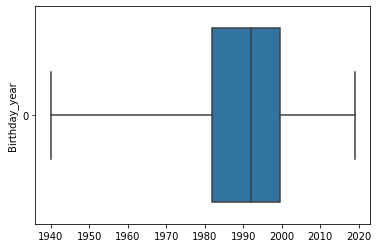

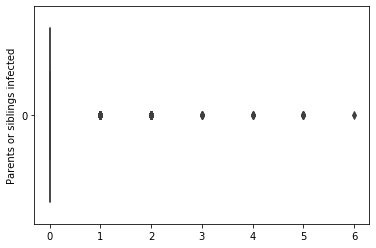

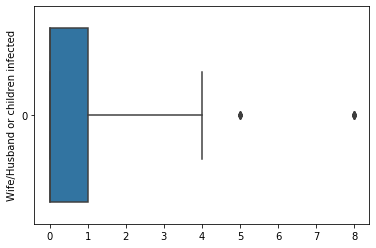

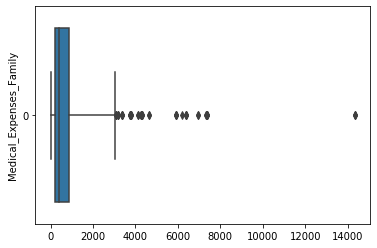

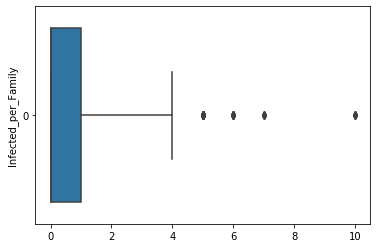

In [27]:
col = ['Birthday_year','Parents or siblings infected','Wife/Husband or children infected','Medical_Expenses_Family','Infected_per_Family']

for c in col:
    sns.boxplot(data=data[c],orient='h',whis=3.5)
    plt.ylabel(c)
    plt.show()

We have outliers in: `Parents or siblings infected`, `Wife/Husband or children infected`, `Medical_Expenses_Family`, and `Infected_per_Family`

Similarly to the replacement of null values, it is impossible to know whether it will be better for the model to remove outliers or not, and another function was created for testing purposes.

In [28]:
def outliers(data, target, std=3, remove=False, pr=False):
    cols = []
    for col in ['Birthday_year','Parents or siblings infected','Wife/Husband or children infected','Medical_Expenses_Family','Infected_per_Family']:
        if col in data.columns:
            cols.append(col)
    
    ind = []
    ind_to_remove = []
    
    if len(cols)>0:
        out = data[cols]
        out = pd.DataFrame(data=StandardScaler().fit_transform(out),index=out.index,columns=out.columns)

        for col in out.columns:
            ind_col = list(out[(out[col]<-std)|(out[col]>std)].index)
            ind += ind_col

        for i in ind:
            if i not in ind_to_remove:
                ind_to_remove.append(i)
            
    if pr == True:
        print(len(ind_to_remove))
    
    if remove == True:
        for i in ind_to_remove:
            data = data.drop(i,0)
            target = target.drop(i,0)
        
        return data, target

In [29]:
outliers(data, target, pr=True)

66


In [30]:
outliers(data, target, std=4, pr=True)

32


If we use 3 standard deviations to find the outliers, we get 66 outliers (7% of the data) which is an acceptable number of records to drop. However this can be prejudicial for the model so tests are going to be made regarding whether or not to remove the outliers and whether 3 or 4 standard deviations should be used.

  ### <font color='#E8800A'>2.5 Oversampling</font> <a class="anchor" id="oversampling"></a>
  [Back to TOC](#toc) 

Since the target variable is unbalanced, a hypothesis is to balance the dataset through oversampling. Undersampling was not considered because there's not much data to begin with.

In [31]:
def oversample(data, target):
    X = pd.concat([data, target], axis=1)      

    false = X[X.Deceased==0]
    true = X[X.Deceased==1]    

    false_upsampled = resample(false,
                               replace=True, # sample with replacement
                               n_samples=len(medium), # match number in majority class
                               random_state=27) # reproducible results        

    upsampled = pd.concat([false_upsampled, true])

    data = upsampled.drop(['Deceased'],1)
    target = upsampled['Deceased']   

    return data, target

  ### <font color='#E8800A'>3. Finding the Best Model</font> <a class="anchor" id="testing"></a>
  [Back to TOC](#toc) 

  ### <font color='#E8800A'>3.1 Tuning Hyperparameters</font> <a class="anchor" id="hyperp"></a>
  [Back to TOC](#toc) 

In [32]:
def avg_score(model_, method='knn', k=1, remove=False, std=3, oversampling=False, scaler=MinMaxScaler(), grid_search=False, parameters=None, features=False):
    # apply kfold
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    n_iter = []
    
    data__ = data.drop(['Name','City'],1)
    
    for train_index, test_index in kf.split(data__,target):
        model = deepcopy(model_)
        
        # get the indexes of the observations assigned for each partition
        X_train, X_test = data__.iloc[train_index], data__.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # deal with the null values
        X_train = null_values(X_train, method=method, k=k)
        X_test = null_values(X_test, method=method,k=k)
            
        # deal with outliers
        if remove == True:
            X_train, y_train = outliers(X_train, y_train, std=std, remove=remove)
        
        # oversample the minority class
        if oversampling == True:
            X_train, y_train = oversample(X_train, y_train)
            
        # scale the data
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # start counting time
        begin = time.perf_counter()
        
        # find the best features
        if features == True:
            rfe = RFECV(estimator = model,n_jobs=-1,scoring='accuracy')
            X_train = rfe.fit_transform(X_train,y_train)
            X_test = rfe.transform(X_test)
            print(rfe.ranking_)
            print(X_train.shape)
        
        # find the best hyperparameters
        if grid_search == True:
            clf = GridSearchCV(model,parameters,n_jobs=-1,scoring='accuracy')
            clf.fit(X_train,y_train)
            model = clf.best_estimator_
            print(clf.best_params_)
            
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # finish counting time
        end = time.perf_counter()
        
        # predictions
        Y_pred = model.predict(X_train)
        y_pred = model.predict(X_test)
        
        # check the mean f1-score for the train
        value_train = model.score(X_train,y_train)
        
        # check the mean f1-score for the test
        value_test = model.score(X_test,y_test)
        
        # print a classification report and confusion matrix
        print(classification_report(y_true=y_test,y_pred=y_pred))
        print(confusion_matrix(y_true=y_test,y_pred=y_pred))
        
        # append the scores, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
        #n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    #avg_iter = round(np.mean(n_iter),1)
    #std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)#, str(avg_iter) + '+/-' + str(std_iter)

In [33]:
def show_results(df, models, method = 'knn', k = 1, remove = False, std = 3, oversampling = False, scaler = MinMaxScaler(), parameters = None,features=False):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for model in models:
        parameter_space = None
        if parameters != None:
            parameter_space = parameters[models.index(model)]
            
        if parameter_space == None:
            grid_search = False
        else:
            grid_search = True
                
        print('----------------------------------')
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(model, method = method, k = k, remove = remove, std = std, oversampling = oversampling, grid_search = grid_search, scaler = scaler, parameters = parameter_space, features = features)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test#, avg_iter
        count+=1

    return df

Before blindly applying GridSearchCV with all the possible hyperparameter values for the algorithms used, a few preliminary tests were run in order to get a general idea of which parameters would be better than others. Here, not all tests that were run are shown, but only the example of the MLPClassifier. These and all tests were done using 5-fold cross validation in order to strike a balance between avoiding overfitting but also having enough data in the test set for the tests to be relevant. Since using 5-fold cross validation means that the train/test split will be 80%/20%, which is a common split, and that the test set has approximately 180 instances, this was the chosen split for the tests that were run.

In [34]:
"""model_simple = MLPClassifier(hidden_layer_sizes=(1,),max_iter=1000,random_state=0)
model_medium = MLPClassifier(hidden_layer_sizes=(50,50),max_iter=1000,random_state=0)
model_complex = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000,random_state=0)"""

In [36]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['Simple','Medium','Complex'])
show_results(df,[model_simple,model_medium,model_complex])"""

----------------------------------
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        69
           1       0.80      0.85      0.82       111

    accuracy                           0.77       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.77      0.77      0.77       180

[[45 24]
 [17 94]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        69
           1       0.81      0.84      0.82       111

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.76       180
weighted avg       0.78      0.78      0.78       180

[[47 22]
 [18 93]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        69
           1       0.81      0.86      0.83       111

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.77       180
w

Time         Train          Test
Simple   2.997+/-1.11   0.806+/-0.0  0.788+/-0.01
Medium   8.396+/-2.14  0.881+/-0.02  0.801+/-0.03
Complex  7.771+/-1.71  0.883+/-0.01  0.803+/-0.02

Performs better with a medium sized network.

In [37]:
"""model_relu = MLPClassifier(activation='relu',max_iter=1000,random_state=0)
model_logistic = MLPClassifier(activation='logistic',max_iter=1000,random_state=0)
model_tanh = MLPClassifier(activation='tanh',max_iter=1000,random_state=0)
model_identity = MLPClassifier(activation='identity',max_iter=1000,random_state=0)"""

In [38]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['relu','logistic','tanh','identity'])
show_results(df,[model_relu,model_logistic,model_tanh,model_identity])"""

----------------------------------
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        69
           1       0.84      0.87      0.85       111

    accuracy                           0.82       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180

[[50 19]
 [14 97]]
              precision    recall  f1-score   support

           0       0.71      0.59      0.65        69
           1       0.77      0.85      0.81       111

    accuracy                           0.75       180
   macro avg       0.74      0.72      0.73       180
weighted avg       0.75      0.75      0.75       180

[[41 28]
 [17 94]]
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        69
           1       0.83      0.92      0.87       111

    accuracy                           0.83       180
   macro avg       0.84      0.81      0.82       180
w

Time         Train          Test
relu      8.735+/-1.57  0.862+/-0.01  0.808+/-0.03
logistic  1.832+/-0.13   0.801+/-0.0  0.784+/-0.03
tanh      4.108+/-3.42  0.824+/-0.02  0.782+/-0.01
identity  0.764+/-0.14   0.805+/-0.0  0.782+/-0.02

Performs better with activation function relu.

In [39]:
"""model_lr_big = MLPClassifier(solver='sgd',learning_rate_init=0.5,max_iter=1000,random_state=0)
model_lr_medium = MLPClassifier(solver='sgd',learning_rate_init=0.001,max_iter=1000,random_state=0)
model_lr_small = MLPClassifier(solver='sgd',learning_rate_init=0.000001,max_iter=1000,random_state=0)"""

In [40]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['big','medium','small'])
show_results(df,[model_lr_big,model_lr_medium,model_lr_small])"""

----------------------------------
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        69
           1       0.83      0.86      0.84       111

    accuracy                           0.80       180
   macro avg       0.79      0.78      0.79       180
weighted avg       0.80      0.80      0.80       180

[[49 20]
 [16 95]]
              precision    recall  f1-score   support

           0       0.81      0.51      0.62        69
           1       0.75      0.93      0.83       111

    accuracy                           0.77       180
   macro avg       0.78      0.72      0.73       180
weighted avg       0.78      0.77      0.75       180

[[ 35  34]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        69
           1       0.83      0.90      0.87       111

    accuracy                           0.83       180
   macro avg       0.82      0.81      0.81       1

Time         Train          Test
big     1.325+/-0.43  0.855+/-0.02  0.803+/-0.02
medium     2.8+/-0.2   0.789+/-0.0  0.782+/-0.02
small   0.142+/-0.01  0.424+/-0.04  0.429+/-0.06

Performs better with a big learning rate.

In [41]:
"""model_lr_big_inv = MLPClassifier(solver='sgd',learning_rate_init=0.5,learning_rate='invscaling',max_iter=1000,random_state=0)
model_lr_medium_inv = MLPClassifier(solver='sgd',learning_rate_init=0.001,learning_rate='invscaling',max_iter=1000,random_state=0)
model_lr_big_adap = MLPClassifier(solver='sgd',learning_rate_init=0.5,learning_rate='adaptive',max_iter=1000,random_state=0)
model_lr_medium_adap = MLPClassifier(solver='sgd',learning_rate_init=0.001,learning_rate='adaptive',max_iter=1000,random_state=0)"""

In [42]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['big_inv','medium_inv','big_adap','medium_adap'])
show_results(df,[model_lr_big_inv,model_lr_medium_inv,model_lr_big_adap,model_lr_medium_adap])"""

----------------------------------
              precision    recall  f1-score   support

           0       0.73      0.68      0.71        69
           1       0.81      0.85      0.83       111

    accuracy                           0.78       180
   macro avg       0.77      0.76      0.77       180
weighted avg       0.78      0.78      0.78       180

[[47 22]
 [17 94]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        69
           1       0.81      0.82      0.81       111

    accuracy                           0.77       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.77      0.77      0.77       180

[[47 22]
 [20 91]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        69
           1       0.81      0.86      0.83       111

    accuracy                           0.79       180
   macro avg       0.78      0.77      0.77       180
w

Time         Train          Test
big_inv        0.8+/-0.37  0.802+/-0.01  0.784+/-0.01
medium_inv   0.304+/-0.02  0.577+/-0.02   0.58+/-0.04
big_adap     4.077+/-0.73  0.877+/-0.02  0.803+/-0.03
medium_adap  3.497+/-0.16   0.789+/-0.0  0.782+/-0.02

With an adaptive learning rate the model performs better.

In [43]:
"""model_lr_big = MLPClassifier(solver='adam',learning_rate_init=0.5,max_iter=1000,random_state=0)
model_lr_medium = MLPClassifier(solver='adam',learning_rate_init=0.001,max_iter=1000,random_state=0)
model_lr_small = MLPClassifier(solver='adam',learning_rate_init=0.000001,max_iter=1000,random_state=0)"""

In [44]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['big','medium','small'])
show_results(df,[model_lr_big,model_lr_medium,model_lr_small])"""

----------------------------------
              precision    recall  f1-score   support

           0       0.84      0.59      0.69        69
           1       0.79      0.93      0.85       111

    accuracy                           0.80       180
   macro avg       0.81      0.76      0.77       180
weighted avg       0.81      0.80      0.79       180

[[ 41  28]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.77      0.54      0.63        69
           1       0.76      0.90      0.82       111

    accuracy                           0.76       180
   macro avg       0.76      0.72      0.73       180
weighted avg       0.76      0.76      0.75       180

[[ 37  32]
 [ 11 100]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        69
           1       0.79      0.90      0.84       111

    accuracy                           0.79       180
   macro avg       0.79      0.76      0.77    

Time         Train          Test
big      0.477+/-0.14  0.817+/-0.01  0.798+/-0.02
medium  10.437+/-2.39  0.862+/-0.01  0.808+/-0.03
small    0.131+/-0.01  0.426+/-0.04  0.429+/-0.06

medium learning rate has the best performance.

In [45]:
"""model_sgd = MLPClassifier(solver='sgd',learning_rate_init=0.5,learning_rate='adaptive',max_iter=1000,random_state=0)
model_adam = MLPClassifier(solver='adam',learning_rate_init=0.001,max_iter=1000,random_state=0)
model_lbfgs = MLPClassifier(solver='lbfgs',max_iter=5000,random_state=0)"""

In [46]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['sgd','adam','lbfgs'])
show_results(df,[model_sgd,model_adam,model_lbfgs])"""

----------------------------------
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        69
           1       0.84      0.85      0.84       111

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

[[51 18]
 [17 94]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66        69
           1       0.78      0.85      0.81       111

    accuracy                           0.76       180
   macro avg       0.74      0.73      0.73       180
weighted avg       0.75      0.76      0.75       180

[[42 27]
 [17 94]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.74        69
           1       0.82      0.89      0.86       111

    accuracy                           0.82       180
   macro avg       0.81      0.79      0.80       180
w

Time         Train          Test
sgd    3.794+/-0.47  0.877+/-0.02  0.803+/-0.03
adam   9.452+/-1.52  0.862+/-0.01  0.808+/-0.03
lbfgs  33.005+/-8.4  0.955+/-0.02  0.757+/-0.01

adam performs slightly better.

In [47]:
"""model_batch5 = MLPClassifier(batch_size=5,max_iter=1000,random_state=0)
model_batch50 = MLPClassifier(batch_size=50,max_iter=1000,random_state=0)
model_batch500 = MLPClassifier(batch_size=500,max_iter=1000,random_state=0)"""

In [48]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=[50,500,5000])
show_results(df,[model_batch5,model_batch50,model_batch500])"""

----------------------------------
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        69
           1       0.82      0.85      0.84       111

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

[[49 20]
 [17 94]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        69
           1       0.78      0.85      0.81       111

    accuracy                           0.76       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.76      0.76      0.76       180

[[43 26]
 [17 94]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        69
           1       0.83      0.90      0.86       111

    accuracy                           0.82       180
   macro avg       0.82      0.80      0.81       180
w

Time         Train          Test
50    21.578+/-13.63  0.868+/-0.02  0.807+/-0.03
500     5.445+/-0.72  0.869+/-0.01  0.812+/-0.03
5000    9.764+/-1.79  0.861+/-0.01  0.811+/-0.03

All values have similar performances, but 50 and 500 are way faster.

After these tests were done a smaller parameter space was set up for future tests.

In [49]:
"""parameter_space = {
    'batch_size':[50,500],
    'max_iter':[5000],
    'random_state':[0]
}"""

  ### <font color='#E8800A'>3.2 Data Cleaning and Scaling</font> <a class="anchor" id="dataclean"></a>
  [Back to TOC](#toc) 

Given that there are so many alternatives on how to clean and scale the data, they're going to be tested against each other.

***Normalizing the data***

Scaling the train data set with the following alternatives:
- **MinMaxScaler**
- **StandardScaler**
- **RobustScaler**
- **MaxAbsScaler**

In [40]:
#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()
#scaler = MaxAbsScaler

remove = True
#remove = False

#std = 3
std = 4

method = 'knn'
#method = 'stat'

#k = 1
k = 2
#k = 3
#k = 4
#k = 5

models = [
    #('knn',KNeighborsClassifier(algorithm='ball_tree',metric='minkowski',n_neighbors=40,p=1,weights='distance')),
    ('nb',GaussianNB()),
    #('svc',SVC(kernel='poly',degree=4,C=1,random_state=0)),
    #('lr',LogisticRegression(random_state=0,C=0.1,fit_intercept=False,l1_ratio=0.9,multi_class='multinomial',
                             #penalty='elasticnet',solver='saga',warm_start=True)),
    ('nn',MLPClassifier(random_state=0,max_iter=2000,batch_size=500)),
    #('dt',DecisionTreeClassifier(random_state=0,splitter='random',max_depth=10,criterion='entropy',ccp_alpha=0.005)),
    #('ada',AdaBoostClassifier(random_state=0,algorithm='SAMME.R',learning_rate=0.1,n_estimators=50)),
    ('gb',GradientBoostingClassifier(loss='deviance',max_depth=4,min_samples_split=5,n_estimators=100,
                                     random_state=0,subsample=0.5,warm_start=True)),
    ('rf',RandomForestClassifier(warm_start=True,random_state=0,n_estimators=550,max_depth=19,criterion='entropy',
                                 ccp_alpha=0))
]

#model = KNeighborsClassifier()
#model = GaussianNB()
#model = SVC()
#model = LogisticRegression()
model = MLPClassifier()
#model = DecisionTreeClassifier()
#model = AbaBoostClassifier()
#model = GradientBoostingClassifier()
#model = RandomForestClassifier()
#model = StackingClassifier(estimators=models)

Not all algorithms were included in order to run the Stacking classifier, due to the fact that it appeared that the accuracy of the test set decreased when any more models were added besides the ones that were included.

In [51]:
"""df = pd.DataFrame(columns=['Time','Train','Test'], index=['model'])
show_results(df,[model],scaler=scaler,remove=remove,std=std,k=k,method=method,parameters=[parameter_space])"""

----------------------------------
{'batch_size': 500, 'max_iter': 5000, 'random_state': 0}
              precision    recall  f1-score   support

           0       0.80      0.68      0.73        69
           1       0.82      0.89      0.85       111

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

[[47 22]
 [12 99]]
{'batch_size': 500, 'max_iter': 5000, 'random_state': 0}
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        69
           1       0.82      0.88      0.85       111

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.80       180
weighted avg       0.81      0.81      0.81       180

[[48 21]
 [13 98]]
{'batch_size': 500, 'max_iter': 5000, 'random_state': 0}
              precision    recall  f1-score   support

           0       0.83      0.72      0.78    

Time         Train          Test
model  58.683+/-6.58  0.929+/-0.01  0.812+/-0.02

The results of these tests can be found in the following tables:

![alt text](knn.jpg "K-Nearest Neighbors results")
![alt text](nb.jpg "Naive Bayes results")
![alt text](lr.jpg "Logistic Regression results")
![alt text](svc.jpg "Support Vector Machine results")
![alt text](mlp.jpg "Multi-Layer Perceptron results")
![alt text](dt.jpg "Decision Tree results")
![alt text](adaboost.jpg "AdaBoost results")
![alt text](gradientboosting.jpg "GradientBoosting results")
![alt text](randomforest.jpg "Random Forest results")
![alt text](stacking.jpg "Stacking results")

  ### <font color='#E8800A'>3.3 Feature Selection</font> <a class="anchor" id="featureselc"></a>
  [Back to TOC](#toc) 

After looking at the best hyperparameters for each model and figuring the optimal way to remove null values for each scaler and approach to remove outliers, each feature was removed separately in order to figure out which ones could be removed. After figuring out which feature most improved the accuracy of the model when removed, the feature would be dropped and the process was repeated until there was no more improvement.

In [52]:
#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()
#scaler = MaxAbsScaler

remove = True
#remove = False

#std = 3
std = 4

method = 'knn'
#method = 'stat'

#k = 1
k = 2
#k = 3
#k = 4
#k = 5

#model = KNeighborsClassifier(algorithm='ball_tree',metric='minkowski',n_neighbors=40,p=1,weights='distance')
#model = GaussianNB()
#model = SVC(kernel='poly',degree=4,C=1,random_state=0)
#model = LogisticRegression(random_state=0,C=0.1,fit_intercept=False,l1_ratio=0.9,multi_class='multinomial',
                           #penalty='elasticnet',solver='saga',warm_start=True)
model = MLPClassifier(random_state=0,max_iter=2000,batch_size=500)
#model = DecisionTreeClassifier(random_state=0,splitter='random',max_depth=10,criterion='entropy',ccp_alpha=0.005)
#model = AdaBoostClassifier(random_state=0,algorithm='SAMME.R',learning_rate=0.1,n_estimators=50)
#model = GradientBoostingClassifier(loss='deviance',max_depth=4,min_samples_split=5,n_estimators=100,random_state=0,
                                   #subsample=0.5,warm_start=True)
#model = RandomForestClassifier(warm_start=True,random_state=0,n_estimators=550,max_depth=19,criterion='entropy',ccp_alpha=0)

In [34]:
data_ = data

In [54]:
"""df = pd.DataFrame(columns=['Time','Train','Test'], index=['model'])
for col in data_.columns:
    if col not in ['Name','Medical_Tent','City']:
        data = data_.drop(col,1)
        print(col)
        print(show_results(df,[model],scaler=scaler,remove=remove,std=std,k=k,method=method))"""

Family_Case_ID
----------------------------------
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        69
           1       0.79      0.90      0.84       111

    accuracy                           0.79       180
   macro avg       0.79      0.76      0.77       180
weighted avg       0.79      0.79      0.79       180

[[ 43  26]
 [ 11 100]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.68        69
           1       0.78      0.88      0.83       111

    accuracy                           0.78       180
   macro avg       0.77      0.75      0.75       180
weighted avg       0.78      0.78      0.77       180

[[42 27]
 [13 98]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        69
           1       0.84      0.84      0.84       111

    accuracy                           0.80       180
   macro avg       0.79      0.79   

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        69
           1       0.83      0.89      0.86       111

    accuracy                           0.82       180
   macro avg       0.82      0.80      0.81       180
weighted avg       0.82      0.82      0.82       180

[[49 20]
 [12 99]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75        70
           1       0.84      0.85      0.84       110

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

[[52 18]
 [17 93]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        70
           1       0.80      0.90      0.85       110

    accuracy                           0.81       180
   macro avg       0.81      0.78      0.79       180
weighted avg       0.81      0.81   

              precision    recall  f1-score   support

           0       0.79      0.64      0.71        70
           1       0.80      0.89      0.84       110

    accuracy                           0.79       180
   macro avg       0.79      0.77      0.77       180
weighted avg       0.79      0.79      0.79       180

[[45 25]
 [12 98]]
                Time        Train          Test
model  13.088+/-1.32  0.933+/-0.0  0.793+/-0.01
Is_young
----------------------------------
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        69
           1       0.83      0.87      0.85       111

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.80       180
weighted avg       0.81      0.81      0.81       180

[[49 20]
 [14 97]]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67        69
           1       0.78      0.87      0.83       111

    

              precision    recall  f1-score   support

           0       0.80      0.68      0.73        69
           1       0.82      0.89      0.85       111

    accuracy                           0.81       180
   macro avg       0.81      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180

[[47 22]
 [12 99]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        69
           1       0.84      0.89      0.86       111

    accuracy                           0.83       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.83      0.83      0.83       180

[[50 19]
 [12 99]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75        70
           1       0.84      0.85      0.84       110

    accuracy                           0.81       180
   macro avg       0.80      0.79      0.79       180
weighted avg       0.81      0.81   

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        70
           1       0.86      0.87      0.87       110

    accuracy                           0.84       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

[[55 15]
 [14 96]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        70
           1       0.79      0.86      0.83       110

    accuracy                           0.78       180
   macro avg       0.77      0.75      0.76       180
weighted avg       0.78      0.78      0.77       180

[[45 25]
 [15 95]]
                Time         Train          Test
model  14.205+/-3.06  0.931+/-0.01  0.806+/-0.03


The results of these tests can be found in the following tables. For the Logistic Regression, Decision Trees and Naive Bayes, since the results before feature selection were not that good to begin with it was decided that feature selection wouldn't be done for those models:

(in yellow are the features removed in order to reach the result in the the column `Multiple`, in green is the model that had the best mean accuracy regarding the validation set, and in red are the cases where removing feature didn't improve at all the accuracy of the model)

![alt text](knn_features.jpg "K-Nearest Neighbors results")
![alt text](svc_features.jpg "Support Vector Machine results")
![alt text](mlp_features.jpg "Multi-Layer Perceptron results")
![alt text](adaboost_features.jpg "AdaBoost results")
![alt text](gradientboosting_features.jpg "GradientBoosting results")
![alt text](randomforest_features.jpg "Random Forest results")
![alt text](stacking_features.jpg "Stacking results")

  ### <font color='#E8800A'>4. Ensemble Models</font> <a class="anchor" id="ensembles"></a>
  [Back to TOC](#toc) 

After finding the best parametrization and features, as well as the best way to clean the data for each model, tests were done with regards to bagging, using the best model as the base.

In [35]:
"""data = data_.drop(['Birthday_year','City_Taos'],1)"""

In [36]:
"""df = pd.DataFrame(columns=['Time','Train','Test'], index=['model'])
bagging = BaggingClassifier(base_estimator=MLPClassifier(random_state=0,max_iter=2000,batch_size=500), random_state=5)"""

In [57]:
"""show_results(df,[bagging],k=2,remove=True,std=4,scaler=RobustScaler())"""

----------------------------------
              precision    recall  f1-score   support

           0       0.79      0.72      0.76        69
           1       0.84      0.88      0.86       111

    accuracy                           0.82       180
   macro avg       0.82      0.80      0.81       180
weighted avg       0.82      0.82      0.82       180

[[50 19]
 [13 98]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        69
           1       0.84      0.89      0.86       111

    accuracy                           0.83       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.83      0.83      0.83       180

[[50 19]
 [12 99]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        69
           1       0.84      0.89      0.86       111

    accuracy                           0.83       180
   macro avg       0.82      0.81      0.81       180
w

Time        Train          Test
model  117.667+/-9.31  0.902+/-0.0  0.821+/-0.02

  ### <font color='#E8800A'>4.1 Bagging</font> <a class="anchor" id="bagging"></a>
  [Back to TOC](#toc)  

In order to get the best results for bagging it is also necessary to tune the hyperparameters of bagging.

In [63]:
#model = KNeighborsClassifier(algorithm='ball_tree',metric='minkowski',n_neighbors=40,p=1,weights='distance')
#model = GaussianNB()
#model = SVC(kernel='poly',degree=4,C=1,random_state=0)
#model = LogisticRegression(random_state=0,C=0.1,fit_intercept=False,l1_ratio=0.9,multi_class='multinomial',
                           #penalty='elasticnet',solver='saga',warm_start=True)
model = MLPClassifier(random_state=0,max_iter=2000,batch_size=500)
#model = DecisionTreeClassifier(random_state=0,splitter='random',max_depth=10,criterion='entropy',ccp_alpha=0.005)
#model = AdaBoostClassifier(random_state=0,algorithm='SAMME.R',learning_rate=0.1,n_estimators=50)
#model = GradientBoostingClassifier(loss='deviance',max_depth=4,min_samples_split=5,n_estimators=100,random_state=0,
                                   #subsample=0.5,warm_start=True)
#model = RandomForestClassifier(warm_start=True,random_state=0,n_estimators=550,max_depth=19,criterion='entropy',ccp_alpha=0)

In [64]:
"""bagging_5 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=5)
bagging_10 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=10)
bagging_15 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=15)
bagging_20 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=20)
bagging_25 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=25)
bagging_30 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=30)
bagging_35 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=35)
bagging_40 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=40)
bagging_45 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=45)
bagging_50 = BaggingClassifier(base_estimator=model, random_state=5, n_estimators=50)"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=range(5,55,5))
show_results(df,[bagging_5,bagging_10,bagging_15,bagging_20,bagging_25,bagging_30,bagging_35,bagging_40,bagging_45,bagging_50],method='stat',scaler=MaxAbsScaler())"""

----------------------------------
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        69
           1       0.82      0.85      0.84       111

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

[[49 20]
 [17 94]]
              precision    recall  f1-score   support

           0       0.73      0.59      0.66        69
           1       0.77      0.86      0.82       111

    accuracy                           0.76       180
   macro avg       0.75      0.73      0.74       180
weighted avg       0.76      0.76      0.76       180

[[41 28]
 [15 96]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        69
           1       0.82      0.95      0.88       111

    accuracy                           0.84       180
   macro avg       0.85      0.81      0.82       180
w

Performs better with 5 estimators.

In [ ]:
"""bagging_05 = BaggingClassifier(base_estimator=model, random_state=5, max_samples=0.5)
bagging_06 = BaggingClassifier(base_estimator=model, random_state=5, max_samples=0.6)
bagging_07 = BaggingClassifier(base_estimator=model, random_state=5, max_samples=0.7)
bagging_08 = BaggingClassifier(base_estimator=model, random_state=5, max_samples=0.8)
bagging_09 = BaggingClassifier(base_estimator=model, random_state=5, max_samples=0.9)
bagging_10 = BaggingClassifier(base_estimator=model, random_state=5, max_samples=1.0)"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=[0.5,0.6,0.7,0.8,0.9,1.0])
show_results(df,[bagging_05,bagging_06,bagging_07,bagging_08,bagging_09,bagging_10],method='stat',scaler=MaxAbsScaler())"""

Performs better with all samples.

In [ ]:
"""bagging_05 = BaggingClassifier(base_estimator=model, random_state=5, max_features=0.5)
bagging_06 = BaggingClassifier(base_estimator=model, random_state=5, max_features=0.6)
bagging_07 = BaggingClassifier(base_estimator=model, random_state=5, max_features=0.7)
bagging_08 = BaggingClassifier(base_estimator=model, random_state=5, max_features=0.8)
bagging_09 = BaggingClassifier(base_estimator=model, random_state=5, max_features=0.9)
bagging_10 = BaggingClassifier(base_estimator=model, random_state=5, max_features=1.0)"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=[0.5,0.6,0.7,0.8,0.9,1.0])
show_results(df,[bagging_05,bagging_06,bagging_07,bagging_08,bagging_09,bagging_10],method='stat',scaler=MaxAbsScaler())"""

Performs better with 0.6 features.

In [ ]:
"""bagging_0 = BaggingClassifier(base_estimator=model, random_state=5, bootstrap=False)
bagging_1 = BaggingClassifier(base_estimator=model, random_state=5, bootstrap=True)"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['no bootstrapping','bootstrapping'])
show_results(df,[bagging_0,bagging_1],method='stat',scaler=MaxAbsScaler())"""

Performs better with bootstrapping.

In [ ]:
"""bagging_0 = BaggingClassifier(base_estimator=model, random_state=5, bootstrap_features=False)
bagging_1 = BaggingClassifier(base_estimator=model, random_state=5, bootstrap_features=True)"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['no bootstrapping','bootstrapping'])
show_results(df,[bagging_0,bagging_1],method='stat',scaler=MaxAbsScaler())"""

Performs better with bootstrapping.

In [ ]:
"""bagging_0 = BaggingClassifier(base_estimator=model, random_state=5, warm_start=False)
bagging_1 = BaggingClassifier(base_estimator=model, random_state=5, warm_start=True)"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['no warm start','warm start'])
show_results(df,[bagging_0,bagging_1],method='stat',scaler=MaxAbsScaler())"""

Inconclusive.

In [ ]:
"""parameter_space = {
    'n_estimators':[5],
    'max_features':[0.7,0.6,],
    'bootstrap':[True,False],
    'bootstrap_features':[True,False],
    #'warm_start':[True,False],
    'base_estimator':[model],
    'random_state':[5]
}

bagging = BaggingClassifier(base_estimator=model, random_state=5)"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'], index=['model'])
show_results(df,[bagging],k=2,remove=True,std=4,scaler=RobustScaler(),parameters=[parameter_space])"""

  ### <font color='#E8800A'>5. Best Model</font> <a class="anchor" id="model"></a>
  [Back to TOC](#toc) 

In [41]:
classifier = StackingClassifier(estimators=models)

In [42]:
X_train = data_.drop(['Name','City','Marital_Status'],1)
y_train = target

# deal with the null values
X_train = null_values(X_train,k=3)

# scale the data
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# fit the model to the data
classifier.fit(X_train,y_train)

# predictions
Y_pred = classifier.predict(X_train)

# check the mean accuracy for the train
value_train = classifier.score(X_train,y_train)

# print a classification report and confusion matrix
print(classification_report(y_true=y_train,y_pred=Y_pred))
print(confusion_matrix(y_true=y_train,y_pred=Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       347
           1       0.94      0.99      0.96       553

    accuracy                           0.96       900
   macro avg       0.96      0.95      0.95       900
weighted avg       0.96      0.96      0.96       900

[[314  33]
 [  7 546]]


  ### <font color='#E8800A'>6. Classifying New Data</font> <a class="anchor" id="newdata"></a>
  [Back to TOC](#toc) 

In [43]:
test = pd.read_csv('test.csv')

In [44]:
test.head()

Patient_ID  Family_Case_ID  Severity               Name  Birthday_year  \
0         901           49242         3     Mr. Jody Pedro            NaN   
1         902           10400         3    Mr. Kevin Brent         1988.0   
2         903           10795         3   Mr. Frankie Cary         1981.0   
3         904           62440         3      Mr. Rick Pete            NaN   
4         905           81311         2  Mr. Matthew Erick         1996.0   

   Parents or siblings infected  Wife/Husband or children infected  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  1   
4                             0                                  0   

   Medical_Expenses_Family Medical_Tent         City  
0                      203          NaN     Santa Fe  
1                      631          NaN     Santa Fe  
2                      376          NaN  Albuquerque  
3                      405          NaN  Albuquerque  
4                      378          NaN     Santa Fe

In [45]:
test.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'Medical_Tent', 'City'],
      dtype='object')

In [46]:
test.dtypes

Patient_ID                             int64
Family_Case_ID                         int64
Severity                               int64
Name                                  object
Birthday_year                        float64
Parents or siblings infected           int64
Wife/Husband or children infected      int64
Medical_Expenses_Family                int64
Medical_Tent                          object
City                                  object
dtype: object

In [47]:
test.shape

(400, 10)

In [48]:
test.describe()

Patient_ID  Family_Case_ID    Severity  Birthday_year  \
count   400.000000      400.000000  400.000000     318.000000   
mean   1100.500000    46024.932500    2.247500    1989.707547   
std     115.614301    39279.856807    0.844409      14.171527   
min     901.000000     1162.000000    1.000000    1944.000000   
25%    1000.750000    13487.000000    1.000000    1980.250000   
50%    1100.500000    26721.500000    3.000000    1993.000000   
75%    1200.250000    79045.000000    3.000000    1999.000000   
max    1300.000000   128562.000000    3.000000    2019.000000   

       Parents or siblings infected  Wife/Husband or children infected  \
count                    400.000000                         400.000000   
mean                       0.400000                           0.452500   
std                        0.998746                           0.910944   
min                        0.000000                           0.000000   
25%                        0.000000                           0.000000   
50%                        0.000000                           0.000000   
75%                        0.000000                           1.000000   
max                        9.000000                           8.000000   

       Medical_Expenses_Family  
count               400.000000  
mean               1013.870000  
std                1587.588114  
min                   0.000000  
25%                 221.000000  
50%                 406.000000  
75%                 883.250000  
max               14345.000000

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient_ID                         400 non-null    int64  
 1   Family_Case_ID                     400 non-null    int64  
 2   Severity                           400 non-null    int64  
 3   Name                               400 non-null    object 
 4   Birthday_year                      318 non-null    float64
 5   Parents or siblings infected       400 non-null    int64  
 6   Wife/Husband or children infected  400 non-null    int64  
 7   Medical_Expenses_Family            400 non-null    int64  
 8   Medical_Tent                       89 non-null     object 
 9   City                               400 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB


In [50]:
test.duplicated().any()

False

In [51]:
test['Infected_per_Family'] = test['Parents or siblings infected'] + test['Wife/Husband or children infected']
test['Marital_Status'] = 0
test['Gender'] = 0
# 2020-60 = 1960
test['Is_young'] = 0
for i in test.index:
    if test['Birthday_year'][i]<=1960:
        test['Is_young'][i] = 0
    elif test['Birthday_year'][i]>1960:
        test['Is_young'][i] = 1
    else:
        test['Is_young'][i] = None

In [52]:
test['Title_Miss'] = test['Name']
test['Title_Ms'] = test['Name']
test['Title_Mrs'] = test['Name']
test['Title_Mr'] = test['Name']
test['Title_Master'] = test['Name']

for i in test.index:
    if test['Name'][i].startswith('Miss'):
        test['Marital_Status'][i] = 0
        test['Gender'][i] = 1
        test['Title_Miss'][i] = 1
        test['Title_Ms'][i] = 0
        test['Title_Mrs'][i] = 0
        test['Title_Mr'][i] = 0
        test['Title_Master'][i] = 0
        
    elif test['Name'][i].startswith('Ms.'):
        test['Marital_Status'][i] = None
        test['Gender'][i] = 1
        test['Title_Miss'][i] = 0
        test['Title_Ms'][i] = 1
        test['Title_Mrs'][i] = 0
        test['Title_Mr'][i] = 0
        test['Title_Master'][i] = 0
        
    elif test['Name'][i].startswith('Mrs.'):
        test['Marital_Status'][i] = 1
        test['Gender'][i] = 1
        test['Title_Miss'][i] = 0
        test['Title_Ms'][i] = 0
        test['Title_Mrs'][i] = 1
        test['Title_Mr'][i] = 0
        test['Title_Master'][i] = 0
        
    elif test['Name'][i].startswith('Mr.'):
        test['Marital_Status'][i] = 1
        test['Gender'][i] = 0
        test['Title_Miss'][i] = 0
        test['Title_Ms'][i] = 0
        test['Title_Mrs'][i] = 0
        test['Title_Mr'][i] = 1
        test['Title_Master'][i] = 0
        
    elif test['Name'][i].startswith('Master'):
        test['Marital_Status'][i] = 0
        test['Gender'][i] = 0
        test['Title_Miss'][i] = 0
        test['Title_Ms'][i] = 0
        test['Title_Mrs'][i] = 0
        test['Title_Mr'][i] = 0
        test['Title_Master'][i] = 1

In [53]:
test['City_SantaFe'] = test['City']
test['City_Albuquerque'] = test['City']
test['City_Taos'] = test['City']

for i in test['City'].index:
    if test['City'][i] == 'Santa Fe':
        test['City_SantaFe'][i] = 1
        test['City_Albuquerque'][i] = 0
        test['City_Taos'][i] = 0
    elif test['City'][i] == 'Albuquerque':
        test['City_SantaFe'][i] = 0
        test['City_Albuquerque'][i] = 1
        test['City_Taos'][i] = 0
    elif test['City'][i] == 'Taos':
        test['City_SantaFe'][i] = 0
        test['City_Albuquerque'][i] = 0
        test['City_Taos'][i] = 1

In [54]:
test.head()

Patient_ID  Family_Case_ID  Severity               Name  Birthday_year  \
0         901           49242         3     Mr. Jody Pedro            NaN   
1         902           10400         3    Mr. Kevin Brent         1988.0   
2         903           10795         3   Mr. Frankie Cary         1981.0   
3         904           62440         3      Mr. Rick Pete            NaN   
4         905           81311         2  Mr. Matthew Erick         1996.0   

   Parents or siblings infected  Wife/Husband or children infected  \
0                             0                                  0   
1                             0                                  0   
2                             1                                  0   
3                             0                                  1   
4                             0                                  0   

   Medical_Expenses_Family Medical_Tent         City  ...  Gender  Is_young  \
0                      203          NaN     Santa Fe  ...       0       NaN   
1                      631          NaN     Santa Fe  ...       0       1.0   
2                      376          NaN  Albuquerque  ...       0       1.0   
3                      405          NaN  Albuquerque  ...       0       NaN   
4                      378          NaN     Santa Fe  ...       0       1.0   

   Title_Miss  Title_Ms Title_Mrs Title_Mr Title_Master City_SantaFe  \
0           0         0         0        1            0            1   
1           0         0         0        1            0            1   
2           0         0         0        1            0            0   
3           0         0         0        1            0            0   
4           0         0         0        1            0            1   

  City_Albuquerque City_Taos  
0                0         0  
1                0         0  
2                1         0  
3                1         0  
4                0         0  

[5 rows x 22 columns]

In [55]:
X_test = test.drop(['Patient_ID','Name','City','Marital_Status'],1)

In [56]:
# deal with the null values
X_test = null_values(X_test,k=3)

In [57]:
# scale the data
X_test = scaler.transform(X_test)

In [58]:
pred = classifier.predict(X_test)

In [59]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [60]:
prediction = pd.DataFrame({'Patient_ID':test['Patient_ID'],'Deceased':pred})

In [61]:
prediction

Patient_ID  Deceased
0           901         1
1           902         1
2           903         1
3           904         1
4           905         1
..          ...       ...
395        1296         1
396        1297         1
397        1298         0
398        1299         1
399        1300         0

[400 rows x 2 columns]

In [62]:
prediction.to_csv('final_stacking.csv',index=False)

  ### <font color='#E8800A'>7. Keras</font> <a class="anchor" id="keras"></a>
  [Back to TOC](#toc) 

As an extra challenge we decided to experiment with packages besides sklearn and so we used keras to build a neural network.

In [ ]:
"""from keras import models,layers,regularizers
import tensorflow as tf"""

In [ ]:
"""data = data_"""

In [ ]:
def avg_score_2(model_, method='knn', k=1, remove=False, std=3, oversampling=False, scaler=MinMaxScaler(), grid_search=False, parameters=None, features=False):
    # apply kfold
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    n_iter = []
    
    data__ = data.drop(['Name','City'],1)
    
    for train_index, test_index in kf.split(data__,target):
        model = deepcopy(model_)
        
        # get the indexes of the observations assigned for each partition
        X_train, X_test = data__.iloc[train_index], data__.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # deal with the null values
        X_train = null_values(X_train, method=method, k=k)
        X_test = null_values(X_test, method=method,k=k)
            
        # deal with outliers
        if remove == True:
            X_train, y_train = outliers(X_train, y_train, std=std, remove=remove)
        
        # oversample the minority class
        if oversampling == True:
            X_train, y_train = oversample(X_train, y_train)
            
        # scale the data
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # start counting time
        begin = time.perf_counter()
        
        # find the best features
        if features == True:
            rfe = RFECV(estimator = model,n_jobs=-1,scoring='accuracy')
            X_train = rfe.fit_transform(X_train,y_train)
            X_test = rfe.transform(X_test)
            print(rfe.ranking_)
            print(X_train.shape)
        
        # find the best hyperparameters
        if grid_search == True:
            clf = GridSearchCV(model,parameters,n_jobs=-1,scoring='accuracy')
            clf.fit(X_train,y_train)
            model = clf.best_estimator_
            print(clf.best_params_)
            
        # fit the model to the data
        model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=250,batch_size=32,verbose=0)
        
        # finish counting time
        end = time.perf_counter()
        
        # predictions
        Y_pred = model.predict(X_train)
        y_pred = model.predict(X_test)
        
        # check the mean f1-score for the train
        value_train = model.evaluate(X_train,y_train)[1]
        print(value_train)
        
        # check the mean f1-score for the test
        value_test = model.score(X_test,y_test)[1]
        print(value_test)
                
        # append the scores, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
        #n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    #avg_iter = round(np.mean(n_iter),1)
    #std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)#, str(avg_iter) + '+/-' + str(std_iter)

In [ ]:
def show_results_2(df, models, method = 'knn', k = 1, remove = False, std = 3, oversampling = False, scaler = MinMaxScaler(), parameters = None,features=False):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for model in models:
        parameter_space = None
        if parameters != None:
            parameter_space = parameters[models.index(model)]
            
        if parameter_space == None:
            grid_search = False
        else:
            grid_search = True
                
        print('----------------------------------')
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score_2(model, method = method, k = k, remove = remove, std = std, oversampling = oversampling, grid_search = grid_search, scaler = scaler, parameters = parameter_space, features = features)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1

    return df

In [ ]:
def build_model(shape,nodes=64,activation='relu',optimizer='rmsprop',loss='binary_crossentropy'):
    np.random.seed(1)
    tf.random.set_seed(2)
    model = models.Sequential()
    model.add(layers.Dense(nodes,activation=activation,input_shape=(shape,)))
    model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(nodes,kernel_regularizer=regularizers.l2(0.001),activation=activation,input_shape=(shape,)))
    model.add(layers.Dense(nodes,activation=activation))
    model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(nodes,kernel_regularizer=regularizers.l2(0.001),activation=activation))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
    return model

## Tuning Hyperparameters

In [ ]:
"""model_16 = build_model(18,16)
model_32 = build_model(18,32)
model_64 = build_model(18)
model_128 = build_model(18,128)"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=[16,32,64,128])
show_results_2(df,[model_16,model_32,model_64,model_128])"""

In [ ]:
"""model_relu = build_model(18)
model_tanh = build_model(18,activation='tanh')"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['relu','tanh'])
show_results_2(df,[model_relu,model_tanh])"""

In [ ]:
"""model_rmsprop = build_model(18)
model_adam = build_model(18,optimizer='adam')"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['rmsprop','adam'])
show_results_2(df,[model_rmsprop,model_adam])"""

In [ ]:
"""model_bin = build_model(18)
model_mse = build_model(18,loss='mse')"""

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'],index=['binary','mse'])
show_results_2(df,[model_bin,model_mse])"""

In [ ]:
"""model = build_model(18)
df = pd.DataFrame(columns=['Time','Train','Test'],index=['model'])
show_results_2(df,[model])"""

## Data Cleaning and Scaling

In [ ]:
#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()
#scaler = MaxAbsScaler

#remove = True
remove = False

std = 3
#std = 4

method = 'knn'
#method = 'stat'

#k = 1
k = 2
#k = 3
#k = 4
#k = 5

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'], index=['model'])
show_results_2(df,[model],scaler=scaler,remove=remove,std=std,k=k,method=method,parameters=[parameter_space])"""

The results of these tests can be found in the following tables:

![alt text](keras.jpg "Keras results")

In [ ]:
#scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = RobustScaler()
#scaler = MaxAbsScaler

#remove = True
remove = False

std = 3
#std = 4

method = 'knn'
#method = 'stat'

#k = 1
k = 2
#k = 3
#k = 4
#k = 5

In [ ]:
"""df = pd.DataFrame(columns=['Time','Train','Test'], index=['model'])
model = build_model(17)
for col in data_.columns:
    if col not in ['Name','Medical_Tent','City']:
        data = data_.drop(col,1)
        print(col)
        print(show_results_2(df,[model],scaler=scaler,remove=remove,std=std,k=k,method=method))"""

The results of these tests can be found in the following tables:

(in yellow are the features removed in order to reach the result in the the column `Multiple`, in green is the model that had the best mean accuracy regarding the validation set, and in red are the cases where removing feature didn't improve at all the accuracy of the model)

![alt text](keras_features.jpg "Keras results")

## Train the Model

In [ ]:
"""X_train = data_.drop(['Name','City','Parents or siblings infected'],1)
y_train = target

# deal with the null values
X_train = null_values(X_train,k=2)

# scale the data
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# fit the model to the data
model.fit(X_train,y_train,epochs=250,batch_size=32)

# predictions
Y_pred = model.predict(X_train)

value_train = model.evaluate(X_train,y_train)[1]
print(value_train)"""

## Predicting new values

In [ ]:
"""X_test = test.drop(['Patient_ID','Name','City','Parents or siblings infected'],1)"""

In [ ]:
"""# deal with the null values
X_test = null_values(X_test,k=2)"""

In [ ]:
"""# scale the data
X_test = scaler.transform(X_test)"""

In [ ]:
"""pred = model.predict(X_test)"""

In [ ]:
"""pred"""

In [ ]:
"""pred_ = []
for p in pred:
    #print(p)
    if p[0] < 0.5:
        p_ = 0
    else:
        p_ = 1
    pred_.append(p_)
pred_"""

In [ ]:
"""prediction = pd.DataFrame({'Patient_ID':test['Patient_ID'],'Deceased':pred_})"""

In [ ]:
"""prediction"""

In [ ]:
"""prediction.to_csv('keras.csv',index=False)"""